In [80]:
import pandas
from tinydb import TinyDB
import numpy
import datetime as dt
import matplotlib.pyplot as mat
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pandas.DataFrame(TinyDB('data/db/db.json').table('games').all())
print(data.head())
print(data.shape)

    app_id                               name          category  \
0   536280                     Disintegration      Action Games   
1   982800                        Moon Tycoon  Simulation Games   
2   767960                           Math RTS    Strategy Games   
3  1368670  Beach Volleyball Competition 2020      Sports Games   
4   977800          At Home Alone - Reward 5$   Adventure Games   

                                                tags  \
0  [FPS, PvE, Vehicular Combat, RTS, Shooter, Str...   
1  [Strategy, Simulation, Indie, Management, Sing...   
2  [Strategy, Indie, Education, RTS, Real-Time, S...   
3  [Sports, Action, Arcade, Character Action Game...   
4  [Strategy, Adventure, Free to Play, RPG, Indie...   

                                     reviews  \
0  {'overall': {'rating': 61, 'count': 120}}   
1           {'overall': 'need_more_reviews'}   
2           {'overall': 'need_more_reviews'}   
3           {'overall': 'need_more_reviews'}   
4           {'overal

In [81]:
# Replacing placeholder value in review data with NaN:
data.loc[(data['reviews'] == {'overall': 'need_more_reviews'}),'reviews'] = numpy.nan
# Splitting review data into overall and recent:
data = pandas.concat([data.drop(['reviews'], axis=1), data['reviews'].apply(pandas.Series)], axis=1)
del data[0]
# Getting rid of recent review data as it is not needed:
del data["recent"]
print(data.head())

    app_id                               name          category  \
0   536280                     Disintegration      Action Games   
1   982800                        Moon Tycoon  Simulation Games   
2   767960                           Math RTS    Strategy Games   
3  1368670  Beach Volleyball Competition 2020      Sports Games   
4   977800          At Home Alone - Reward 5$   Adventure Games   

                                                tags  \
0  [FPS, PvE, Vehicular Combat, RTS, Shooter, Str...   
1  [Strategy, Simulation, Indie, Management, Sing...   
2  [Strategy, Indie, Education, RTS, Real-Time, S...   
3  [Sports, Action, Arcade, Character Action Game...   
4  [Strategy, Adventure, Free to Play, RPG, Indie...   

                                         playtracker  \
0  {'popularity': 2, 'estimated_players': 159000,...   
1                                                NaN   
2                                                NaN   
3                                   

In [82]:
# Splitting overall review data into two columns:
data = pandas.concat([data.drop(['overall'], axis=1), data['overall'].apply(pandas.Series)], axis=1)
del data[0]
data.rename(columns = {'count':'review_count'}, inplace = True)
print(data.head())

    app_id                               name          category  \
0   536280                     Disintegration      Action Games   
1   982800                        Moon Tycoon  Simulation Games   
2   767960                           Math RTS    Strategy Games   
3  1368670  Beach Volleyball Competition 2020      Sports Games   
4   977800          At Home Alone - Reward 5$   Adventure Games   

                                                tags  \
0  [FPS, PvE, Vehicular Combat, RTS, Shooter, Str...   
1  [Strategy, Simulation, Indie, Management, Sing...   
2  [Strategy, Indie, Education, RTS, Real-Time, S...   
3  [Sports, Action, Arcade, Character Action Game...   
4  [Strategy, Adventure, Free to Play, RPG, Indie...   

                                         playtracker  \
0  {'popularity': 2, 'estimated_players': 159000,...   
1                                                NaN   
2                                                NaN   
3                                   

In [83]:
# Splitting playtracker into multiple columns:
data = pandas.concat([data.drop(['playtracker'], axis=1), data['playtracker'].apply(pandas.Series)], axis=1)
del data[0]
print(data.head())

    app_id                               name          category  \
0   536280                     Disintegration      Action Games   
1   982800                        Moon Tycoon  Simulation Games   
2   767960                           Math RTS    Strategy Games   
3  1368670  Beach Volleyball Competition 2020      Sports Games   
4   977800          At Home Alone - Reward 5$   Adventure Games   

                                                tags  \
0  [FPS, PvE, Vehicular Combat, RTS, Shooter, Str...   
1  [Strategy, Simulation, Indie, Management, Sing...   
2  [Strategy, Indie, Education, RTS, Real-Time, S...   
3  [Sports, Action, Arcade, Character Action Game...   
4  [Strategy, Adventure, Free to Play, RPG, Indie...   

                                            steamspy  review_count  rating  \
0  {'price': 39.99, 'discount': 0.0, 'release_dat...         120.0    61.0   
1  {'price': 4.99, 'discount': 50.0, 'release_dat...           NaN     NaN   
2  {'price': 4.99, 'discou

In [84]:
# Splitting categories into multiple columns:
cat = pandas.DataFrame(data["category"])
cat = pandas.get_dummies(cat)
# Merging back together:
del data["category"]
data = data.merge(cat, left_index=True, right_index=True)
print(data.head())

    app_id                               name  \
0   536280                     Disintegration   
1   982800                        Moon Tycoon   
2   767960                           Math RTS   
3  1368670  Beach Volleyball Competition 2020   
4   977800          At Home Alone - Reward 5$   

                                                tags  \
0  [FPS, PvE, Vehicular Combat, RTS, Shooter, Str...   
1  [Strategy, Simulation, Indie, Management, Sing...   
2  [Strategy, Indie, Education, RTS, Real-Time, S...   
3  [Sports, Action, Arcade, Character Action Game...   
4  [Strategy, Adventure, Free to Play, RPG, Indie...   

                                            steamspy  review_count  rating  \
0  {'price': 39.99, 'discount': 0.0, 'release_dat...         120.0    61.0   
1  {'price': 4.99, 'discount': 50.0, 'release_dat...           NaN     NaN   
2  {'price': 4.99, 'discount': 0.0, 'release_date...           NaN     NaN   
3  {'price': 5.99, 'discount': 50.0, 'release_dat...    

In [85]:
# Splitting the dataset into two to make operations for tags easier:
game_info = data.copy()
del game_info['tags']
tags = pandas.DataFrame(data['tags'])
# Creating a column for each tag:
tags = pandas.concat([tags.drop(['tags'], axis=1), tags['tags'].apply(pandas.Series)], axis=1)
tags = pandas.get_dummies(tags)
tags.rename(columns=lambda x: x.split("_")[1], inplace=True)
tags.rename(columns=lambda x: 'tag_' + x, inplace=True)
tags = tags.groupby(level=0, axis=1).sum()
print(game_info.head())
print(tags.head())

    app_id                               name  \
0   536280                     Disintegration   
1   982800                        Moon Tycoon   
2   767960                           Math RTS   
3  1368670  Beach Volleyball Competition 2020   
4   977800          At Home Alone - Reward 5$   

                                            steamspy  review_count  rating  \
0  {'price': 39.99, 'discount': 0.0, 'release_dat...         120.0    61.0   
1  {'price': 4.99, 'discount': 50.0, 'release_dat...           NaN     NaN   
2  {'price': 4.99, 'discount': 0.0, 'release_date...           NaN     NaN   
3  {'price': 5.99, 'discount': 50.0, 'release_dat...           NaN     NaN   
4  {'price': 4.99, 'discount': 0.0, 'release_date...           NaN     NaN   

   average_playtime  estimated_active_players  estimated_players  popularity  \
0               0.6                   25000.0           159000.0         2.0   
1               NaN                       NaN                NaN         NaN

In [86]:
# Merging the tables back together:
games = game_info.merge(tags, left_index=True, right_index=True)
print(games.head())
print(games.shape)

    app_id                               name  \
0   536280                     Disintegration   
1   982800                        Moon Tycoon   
2   767960                           Math RTS   
3  1368670  Beach Volleyball Competition 2020   
4   977800          At Home Alone - Reward 5$   

                                            steamspy  review_count  rating  \
0  {'price': 39.99, 'discount': 0.0, 'release_dat...         120.0    61.0   
1  {'price': 4.99, 'discount': 50.0, 'release_dat...           NaN     NaN   
2  {'price': 4.99, 'discount': 0.0, 'release_date...           NaN     NaN   
3  {'price': 5.99, 'discount': 50.0, 'release_dat...           NaN     NaN   
4  {'price': 4.99, 'discount': 0.0, 'release_date...           NaN     NaN   

   average_playtime  estimated_active_players  estimated_players  popularity  \
0               0.6                   25000.0           159000.0         2.0   
1               NaN                       NaN                NaN         NaN

In [87]:
# Checking if the tags seem right for tag "Strategy":
print(games["tag_Strategy"].head())
# They seem to be right.

0    1
1    1
2    1
3    0
4    1
Name: tag_Strategy, dtype: uint8


In [88]:
# Splitting steamspy data into multiple columns:
games = pandas.concat([games.drop(['steamspy'], axis=1), games['steamspy'].apply(pandas.Series)], axis=1)
print(games.head())

    app_id                               name  review_count  rating  \
0   536280                     Disintegration         120.0    61.0   
1   982800                        Moon Tycoon           NaN     NaN   
2   767960                           Math RTS           NaN     NaN   
3  1368670  Beach Volleyball Competition 2020           NaN     NaN   
4   977800          At Home Alone - Reward 5$           NaN     NaN   

   average_playtime  estimated_active_players  estimated_players  popularity  \
0               0.6                   25000.0           159000.0         2.0   
1               NaN                       NaN                NaN         NaN   
2               NaN                       NaN                NaN         NaN   
3               NaN                       NaN                NaN         NaN   
4               NaN                       NaN                NaN         NaN   

   category_- Arcane Raise -  category_Action  ...  tag_Western  \
0                        

In [89]:
games = pandas.concat([games.drop(['release_date'], axis=1), games['release_date'].apply(pandas.Series)], axis=1)
games['release_date'] = pandas.to_datetime(games[['year', 'month', 'day']])
games['years_since_release'] = ((pandas.to_datetime("2020-09-14") - games['release_date']).dt.days) / 365
# Checking whether there are missing values (especially for date values):
print(games.isnull().sum())
# For more than half of the games review data is missing. For playtracker data even more.
# Since the number of missing values are the same for day, month and year, there's no need to impute one of them:
del games[0]
del games['year']
del games['month']
del games['day']
print(games.head())

app_id                     0
name                       0
review_count           43741
rating                 43741
average_playtime       56230
                       ...  
day                     6139
month                   6139
year                    6139
release_date            6139
years_since_release     6139
Length: 553, dtype: int64
    app_id                               name  review_count  rating  \
0   536280                     Disintegration         120.0    61.0   
1   982800                        Moon Tycoon           NaN     NaN   
2   767960                           Math RTS           NaN     NaN   
3  1368670  Beach Volleyball Competition 2020           NaN     NaN   
4   977800          At Home Alone - Reward 5$           NaN     NaN   

   average_playtime  estimated_active_players  estimated_players  popularity  \
0               0.6                   25000.0           159000.0         2.0   
1               NaN                       NaN                NaN    

In [90]:
# Investigating if nas in playtracker are in the same places as in review data:
games['both_na'] = numpy.where(((games['estimated_players'].isnull()) & (games['rating'].isnull())), 1, 0)
print(sum(games['both_na']))

39154


In [91]:
# It can be concluded that those are games that do not have any players:
games['estimated_players'] = games.apply(lambda x : x['estimated_players'] if x['both_na'] == 0 else 0, axis=1)
games['estimated_active_players'] = games.apply(lambda x : x['estimated_active_players'] if x['both_na'] == 0 else 0, axis=1)
games['average_playtime'] = games.apply(lambda x : x['average_playtime'] if x['both_na'] == 0 else 0, axis=1)
games['popularity'] = games.apply(lambda x : x['popularity'] if x['both_na'] == 0 else 0.0, axis=1)
games['rating'] = games.apply(lambda x : x['rating'] if x['both_na'] == 0 else 0.0, axis=1)
games['review_count'] = games.apply(lambda x : x['review_count'] if x['both_na'] == 0 else 0.0, axis=1)
del games['both_na']
print(games.isnull().sum())
# The quantity of nas was reduced by a considerable amount.

app_id                     0
name                       0
review_count            4587
rating                  4587
average_playtime       17076
                       ...  
tag_eSports                0
price                   9576
discount                9576
release_date            6139
years_since_release     6139
Length: 549, dtype: int64


In [92]:
# Dropping the rows where 'estimated_players' is na as it is the variable we want to predict.
games = games[games['estimated_players'].notna()]
# Dropping the rows where 'rating' is na as well as those are online about 4500 and would 
# hinder our predictions otherwise:
games = games[games['rating'].notna()]
print(games.isnull().sum())
# There are still quite a few missing values in the former steamspy data. Where the release that is given, the
# price and discount will simply be imputed with the mean values. The rows where the release date is missing will be
# dropped as the release date is an important indicator for the number of players.
games = games[games['release_date'].notna()]
games['price'].fillna(games['price'].mean(), inplace=True)
games['discount'].fillna(games['discount'].mean(), inplace=True)
print(games.isnull().sum())

app_id                    0
name                      0
review_count              0
rating                    0
average_playtime          0
                       ... 
tag_eSports               0
price                  8317
discount               8317
release_date           5707
years_since_release    5707
Length: 549, dtype: int64
app_id                 0
name                   0
review_count           0
rating                 0
average_playtime       0
                      ..
tag_eSports            0
price                  0
discount               0
release_date           0
years_since_release    0
Length: 549, dtype: int64


In [93]:
# Get summary for a number of columns (most of categories and tags left out):
print(games.describe())
# It's visible that for the playtracker and review data more than 50% have the value 0. This
# is a consequence of the imputation. But as mentioned, it is assumed that the data was missing
# because these were games that no one plays.
# It's also visible that most games have no discount (75% quantil still 0) and most of them are 
# relatively new.

       review_count        rating  average_playtime  estimated_active_players  \
count  4.885100e+04  48851.000000      48851.000000              4.885100e+04   
mean   4.550175e+02     23.209310          1.180357              9.439766e+03   
std    8.930217e+03     35.928915          5.649756              8.105955e+04   
min    0.000000e+00      0.000000          0.000000              0.000000e+00   
25%    0.000000e+00      0.000000          0.000000              0.000000e+00   
50%    0.000000e+00      0.000000          0.000000              0.000000e+00   
75%    2.300000e+01     60.000000          0.400000              1.000000e+03   
max    1.296235e+06    100.000000        284.600000              8.000000e+06   

       estimated_players    popularity  category_- Arcane Raise -  \
count       4.885100e+04  48851.000000               48851.000000   
mean        1.371055e+05      1.077460                   0.000020   
std         5.275239e+05      4.667733                   0.0045

In [95]:
# Checking for negative values of years_since_release, since the min-value is negative:
print(games.loc[games['years_since_release'] < 0])
# It seems there are 1048 games that weren't released yet. They will get dropped as they can't give
# an indication about the number of players:
games = games[games['years_since_release'] >= 0]
print(games.describe())

        app_id                                            name  review_count  \
235    1291037         Simplode Suite - Basic Power Management           0.0   
278    1137390                                   Kyber Knights           0.0   
311    1366620                            Nyanroo The Supercat           0.0   
323    1339340                             The Unbeatable Path           0.0   
420     970830  The Dungeon Of Naheulbeuk: The Amulet Of Chaos           0.0   
...        ...                                             ...           ...   
75596  1389850                                Digital Janitors           0.0   
75686   720560                        Vigil: The Longest Night           0.0   
75862   583750                                     Skyclimbers           0.0   
76046  1389440                                 Call of Knights           0.0   
76070   912900                                  Bunker Defense           0.0   

       rating  average_playtime  estima

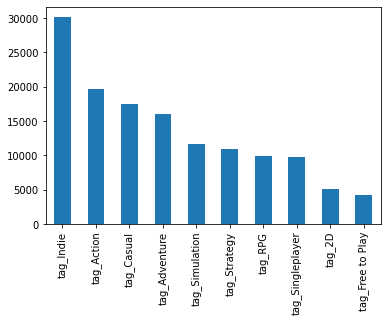

                      0
tag_Indie         30146
tag_Action        19611
tag_Casual        17501
tag_Adventure     16056
tag_Simulation    11617
...                 ...
tag_Benchmark         4
tag_Feature Film      4
tag_Reboot            3
tag_Action RTS        2
tag_Breathtaking      1

[422 rows x 1 columns]


In [96]:
# Counting the occurences of tags:
tag_filter = [col for col in games if col.startswith('tag_')]
tag_cols = games[tag_filter]
tag_count = tag_cols.sum()
tag_c = pandas.DataFrame(tag_count)
tag_c = tag_c.sort_values(by=0, ascending=False)
topten = tag_c.iloc[:10]
topten[0].plot(kind='bar')
mat.show()
print(tag_c)

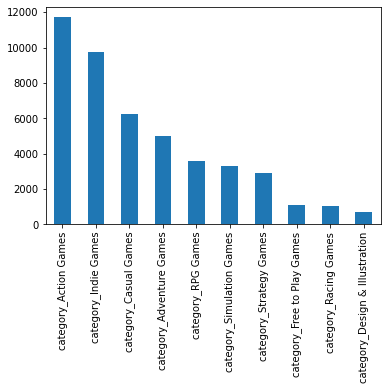

                                               0
category_Action Games                      11713
category_Indie Games                        9768
category_Casual Games                       6252
category_Adventure Games                    4994
category_RPG Games                          3582
...                                          ...
category_Total War Official Franchise          0
category_Resident Evil Franchise               0
category_Call of Duty®: Modern Warfare® 3      0
category_SteamWorld Heist                      0
category_Half-Life Franchise Franchise         0

[115 rows x 1 columns]
(47803, 434)


In [97]:
# Barplot of the 10 most common categories:
cat_filter = [col for col in games if col.startswith('category_')]
cat_cols = games[cat_filter]
cat_count = cat_cols.sum()
cat_c = pandas.DataFrame(cat_count)
cat_c = cat_c.sort_values(by=0, ascending=False)
top = cat_c.iloc[:10]
top[0].plot(kind='bar')
mat.show()
print(cat_c)
# There are some categories that don't have any value anymore after the dropping of some rows.
# They will therefore get deleted.
games = games.drop(games[(cat_count == 0).index], axis=1)
print(games.shape)
# It seems 115 columns were deleted.

In [100]:
# Splitting the data into train and test:
x = games.copy()
del x['app_id']
del x['name']
del x['estimated_players']
del x['estimated_active_players']
del x['release_date']
del x['popularity']
del x['review_count']
y = pandas.DataFrame(games['estimated_players'])
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 206, shuffle=True)
# Running a linear regression with all (structured) columns:
model = LinearRegression()
result = model.fit(x_train, y_train)
pred = result.predict(x_test)
# R-squared:
print("R-squared train:", result.score(x_train, y_train))
print("R-squared test:", result.score(x_test, y_test))
# RMSE:
print("RMSE:", numpy.sqrt(mean_squared_error(y_test, pred)))
print(games['estimated_players'].mean())
# The predictive power is pretty low.

R-squared train: 0.4312673253081065
R-squared test: 0.3953723496917706
RMSE: 395108.9403367848
140085.60109198166
